# Análisis Exploratorio

In [1]:
import pandas as pd

file_path = 'phase2_train_v0.csv'
data = pd.read_csv(file_path)
print("Columnas del conjunto de datos:")
print(data.columns)


Columnas del conjunto de datos:
Index(['img_fName', 'img_w', 'img_h', 'bbx_xtl', 'bbx_ytl', 'bbx_xbr',
       'bbx_ybr', 'class_label'],
      dtype='object')


# Descripción de las variables
- img_fName: Nombre del archivo de imagen(object).
- img_w: Ancho de la imagen en píxeles(int 64).
- img_h: Altura de la imagen en píxeles(int 64).
- bbx_xtl: Coordenada X del vértice superior izquierdo del cuadro delimitador(int 64).
- bbx_ytl: Coordenada Y del vértice superior izquierdo del cuadro delimitador(int 64).
- bbx_xbr: Coordenada X del vértice inferior derecho del cuadro delimitador(int 64).
- bbx_ybr: Coordenada Y del vértice inferior derecho del cuadro delimitador(int 64).
- class_label: Etiqueta de clase que representa la especie o género del mosquito en la imagen(object).


Hay un total de 10357 imágenes


## Haga un resumen de las variables numéricas y tablas de frecuencia para las variables categóricas, escriba lo que vaya encontrando, si aplica

In [3]:
import pandas as pd


# Resumen de las variables numéricas
numerical_summary = data.describe()
print("Resumen de las variables numéricas:")
print(numerical_summary)

# Tablas de frecuencia para la variable categórica 'class_label'
categorical_summary = data['class_label'].value_counts()
print("\nTablas de frecuencia para la variable 'class_label':")
print(categorical_summary)


Resumen de las variables numéricas:
              img_w         img_h       bbx_xtl       bbx_ytl       bbx_xbr  \
count  10357.000000  10357.000000  10357.000000  10357.000000  10357.000000   
mean    2039.716327   2470.491165    666.901323    887.978372   1330.077532   
std     1174.279458   1357.607784    512.356341    645.361851    793.412874   
min      139.000000    106.000000      0.000000      0.000000    128.000000   
25%     1024.000000   1109.000000    276.000000    394.000000    640.000000   
50%     1844.000000   2208.000000    502.000000    677.000000   1154.000000   
75%     3024.000000   4000.000000    987.000000   1349.000000   1880.000000   
max     9280.000000  12000.000000   3977.000000   5459.000000   7327.000000   

            bbx_ybr  
count  10357.000000  
mean    1565.666699  
std      903.075535  
min       85.000000  
25%      761.000000  
50%     1337.000000  
75%     2304.000000  
max     7601.000000  

Tablas de frecuencia para la variable 'class_label':


# Cruce las variables que considere que son las más importantes para hallar los elementos clave que lo pueden llevar a comprender lo que está causando el problema encontrado.


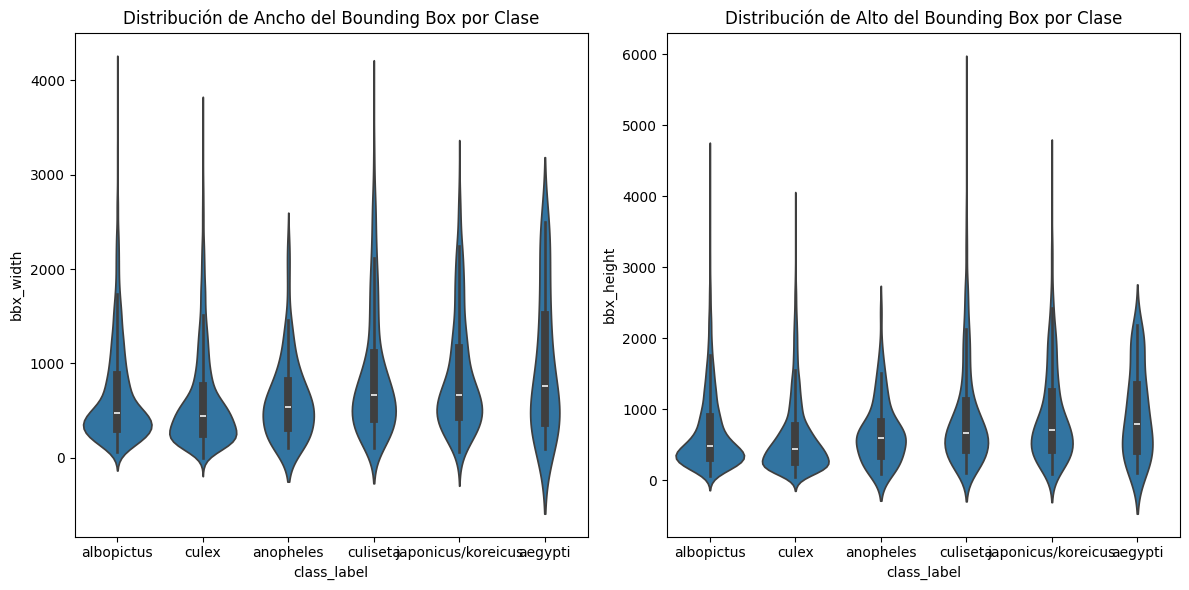

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


data['bbx_width'] = data['bbx_xbr'] - data['bbx_xtl']
data['bbx_height'] = data['bbx_ybr'] - data['bbx_ytl']
plt.figure(figsize=(12, 6))

# Gráfico de violín para mostrar la distribución de ancho por clase
plt.subplot(1, 2, 1)
sns.violinplot(x='class_label', y='bbx_width', data=data)
plt.title('Distribución de Ancho del Bounding Box por Clase')

# Gráfico de violín para mostrar la distribución de alto por clase
plt.subplot(1, 2, 2)
sns.violinplot(x='class_label', y='bbx_height', data=data)
plt.title('Distribución de Alto del Bounding Box por Clase')

plt.tight_layout()
plt.show()


Las clases albopictus y culex son bastante similares en términos de los tamaños de los cuadros delimitadores, mientras que anopheles y aegypti son más consistentes en el tamaño del cuadro. Las clases como culiseta y japonicus/koreicus muestran una mayor variabilidad, lo que está dificultando su clasificación adecuada. Ajustar los cuadros delimitadores  para normalizar el tamaño de las imágenes ayudaría a mejorar la clasificación.

 #  Haga gráficos exploratorios que le de ideas del estado de los datos

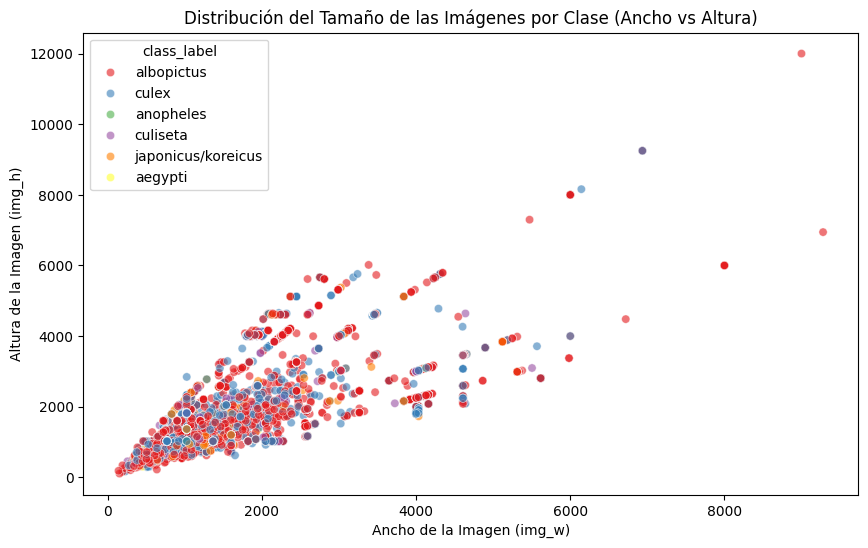

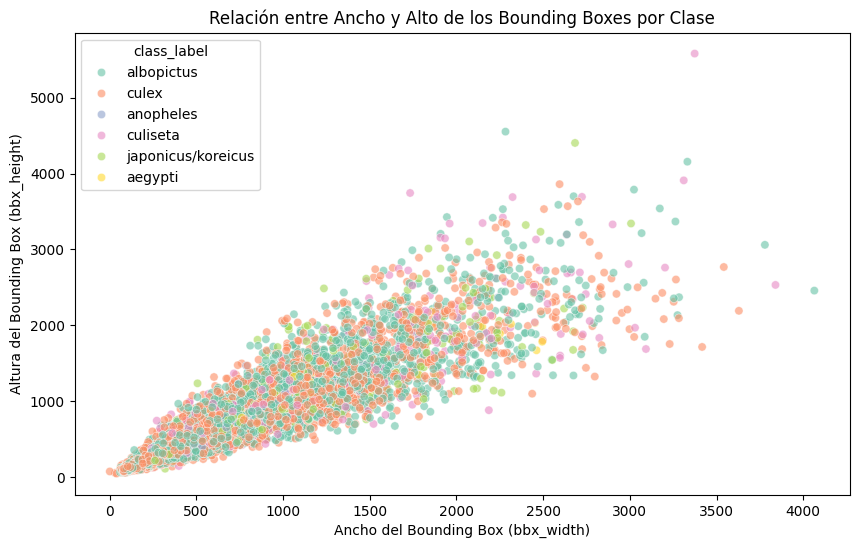

C:\Users\marce\AppData\Local\Temp\ipykernel_32188\4200571877.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_label', data=data, palette='Set3')


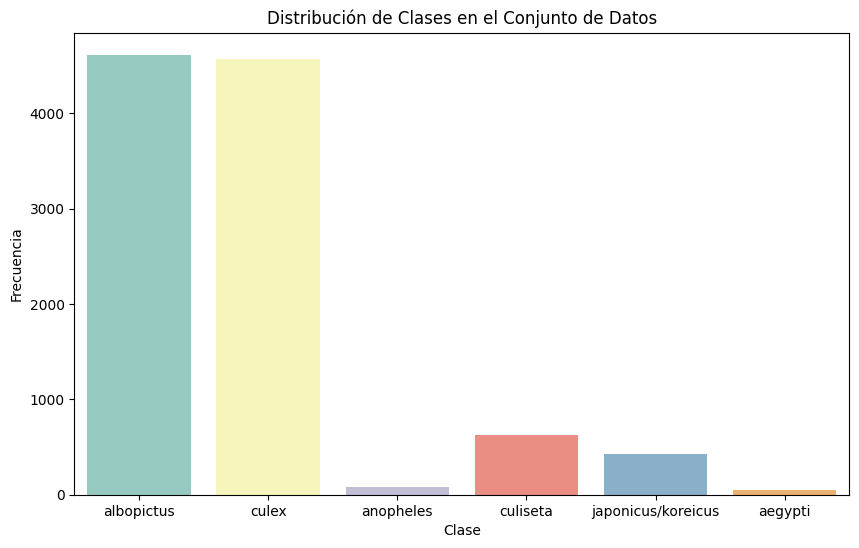

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['bbx_width'] = data['bbx_xbr'] - data['bbx_xtl']
data['bbx_height'] = data['bbx_ybr'] - data['bbx_ytl']

# Gráfico 1: Distribución del tamaño de las imágenes (Ancho x Altura)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='img_w', y='img_h', hue='class_label', data=data, palette='Set1', alpha=0.6)
plt.title('Distribución del Tamaño de las Imágenes por Clase (Ancho vs Altura)')
plt.xlabel('Ancho de la Imagen (img_w)')
plt.ylabel('Altura de la Imagen (img_h)')
plt.show()

# Gráfico 2: Relación entre el ancho y alto de los cuadros delimitadores por clase
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bbx_width', y='bbx_height', hue='class_label', data=data, palette='Set2', alpha=0.6)
plt.title('Relación entre Ancho y Alto de los Bounding Boxes por Clase')
plt.xlabel('Ancho del Bounding Box (bbx_width)')
plt.ylabel('Altura del Bounding Box (bbx_height)')
plt.show()

# Gráfico 3: Distribución de las clases en el conjunto de datos
plt.figure(figsize=(10, 6))
sns.countplot(x='class_label', data=data, palette='Set3')
plt.title('Distribución de Clases en el Conjunto de Datos')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()
